In [15]:
using Statistics
using Plots

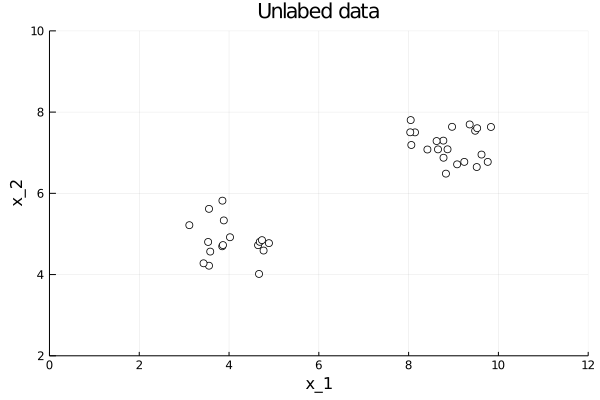

In [16]:
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
    end 

cluster1 = [(4 + (-1)^rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

cluster2 = [(9 + (-1)^rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]


data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Unlabed data")

scatter!(data,color = "white")

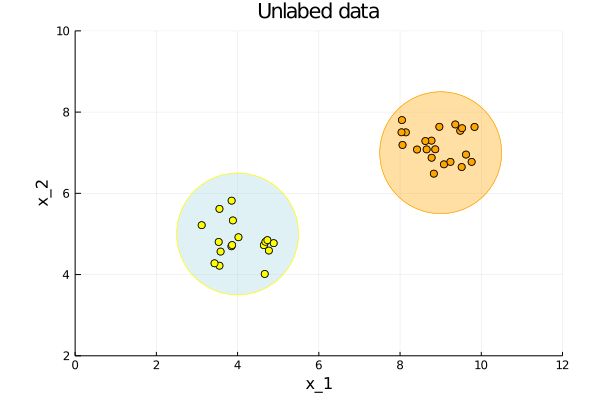

In [18]:
plot!(circleShape(4, 5, 1.5),
        seriestype = [:shape,],
        lw=0.5,
        c="lightblue",
        legend=false,
        linecolor="yellow",
        fillalpha=0.2,
        aspect_ratio=1)

plot!(circleShape(9, 7, 1.5),
        seriestype = [:shape,],
        lw=0.5,
        c="orange",
        legend=false,
        linecolor="orange",
        fillalpha=0.2,
        aspect_ratio=1)

scatter!(cluster1,color = "yellow")
scatter!(cluster2,color = "orange")

In [19]:
function euclidean_distance(p1,p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

In [20]:
function k_means_distance(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end

k_means_distance (generic function with 1 method)

In [25]:
function k_mean_clusters(X, centroids , k)
    distances = k_means_distance(X, centroids , k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
                end 
            end 
        end 
    return clusters
end

k_mean_clusters (generic function with 1 method)

In [26]:
function k_mean_new_centroids(X,centroids, k)
    clusters = k_mean_clusters(X,centroids,k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
        end 
    return new_centers
end

k_mean_new_centroids (generic function with 1 method)

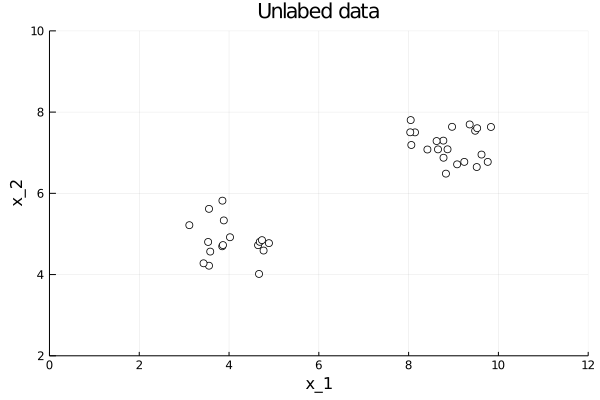

In [64]:
plot(legend = false, 
xlabel = "x_1", 
xlim = (0,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Unlabed data")

scatter!(data,color = "white")

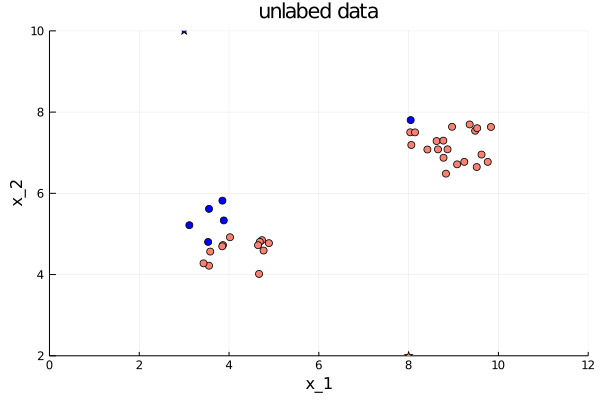

In [65]:
#create random new center points
initial_centers = [(rand(1:10),rand(1:10)),(rand(1:10),rand(1:10))]
#Classify points in these random new clusters
clusters = k_mean_clusters(data, initial_centers,2)

#Plot the data with the clusters with classification colors. 
plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initial_centers[1]], color = "salmon", shape = :star5)
scatter!([initial_centers[2]], color = "blue", shape = :star5)

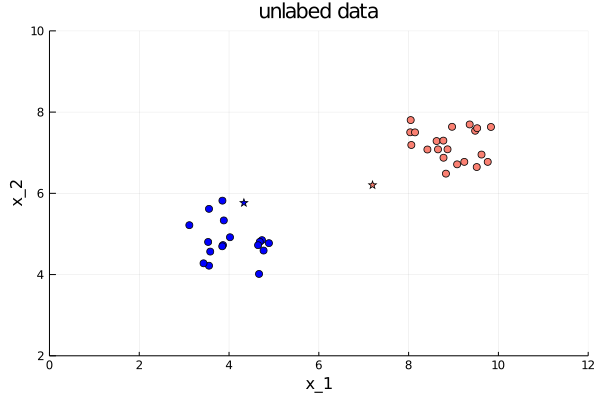

In [66]:
centroids_test1 = k_mean_new_centroids(data, initial_centers, 2)

clusters = k_mean_clusters(data,centroids_test1, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test1[1]], color = "salmon", shape = :star5)
scatter!([centroids_test1[2]], color = "blue", shape = :star5)

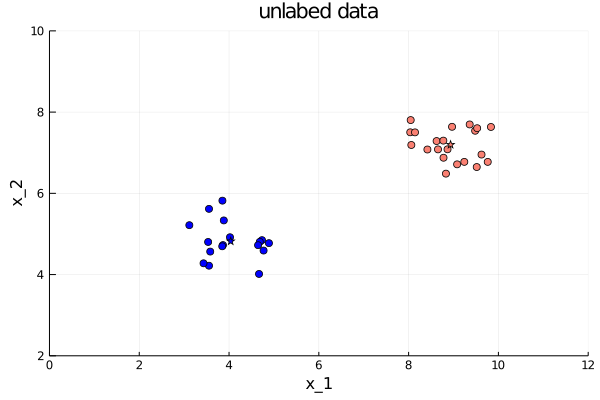

In [67]:
centroids_test2 = k_mean_new_centroids(data, centroids_test1, 2)

clusters = k_mean_clusters(data,centroids_test2, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test2[1]], color = "salmon", shape = :star5)
scatter!([centroids_test2[2]], color = "blue", shape = :star5)